![](DaThabor_Logo.png)

----------

# MENTORING SESSIONS

<br>

May, 2020

<br>

## Simple Linear Regression Assignment - Code Only

<br>

----------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

## DATA DICTIONARY

    CRIM: Per capita crime rate by town
    ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
    INDUS: Proportion of non-retail business acres per town
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling
    AGE: Proportion of owner-occupied units built prior to 1940
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TAX: Full-value property tax rate per $10,000
    PTRATIO: Pupil-teacher ratio by town
    
    B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
    
    LSTAT: Percentage of lower status of the population
    MEDV: Median value of owner-occupied homes in $1000s

Load the data, add the target variable `MEDV` and look at the first 5 observations.

In [11]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [12]:
boston_df['MEDV'] = boston.target


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# START FROM HERE

<br>

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [ ]:
boston_df.head()

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [14]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [15]:
boston_df.shape

(506, 14)

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

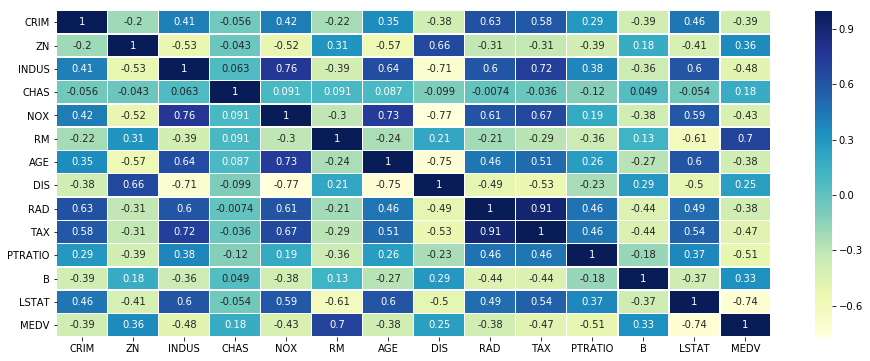

In [16]:
plt.figure(figsize=(16,6))
sns.heatmap(boston_df.corr(), 
            cmap="YlGnBu", 
            annot = True, 
            linewidths=.5)
plt.show()

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

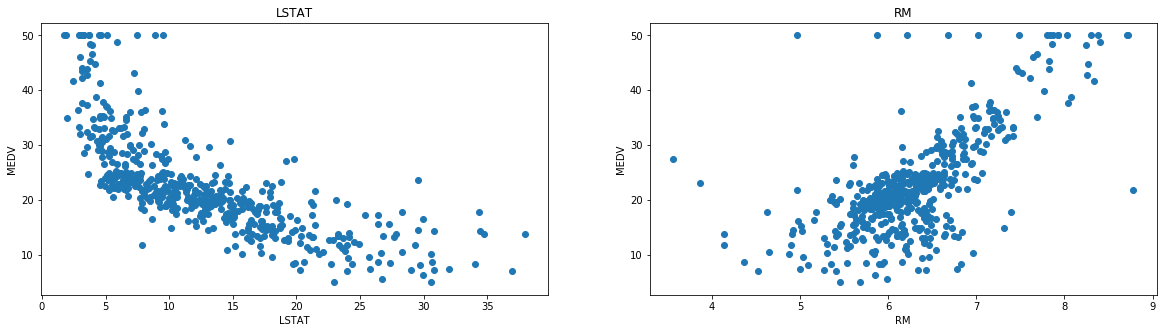

In [29]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston_df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [22]:
X = boston_df['RM'].values.reshape(-1,1)
y = boston_df['MEDV'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X + \u03B5".format(reg.intercept_[0], 
                                                                reg.coef_[0][0]))

The linear model is: Y = -34.671 + 9.1021X + ε


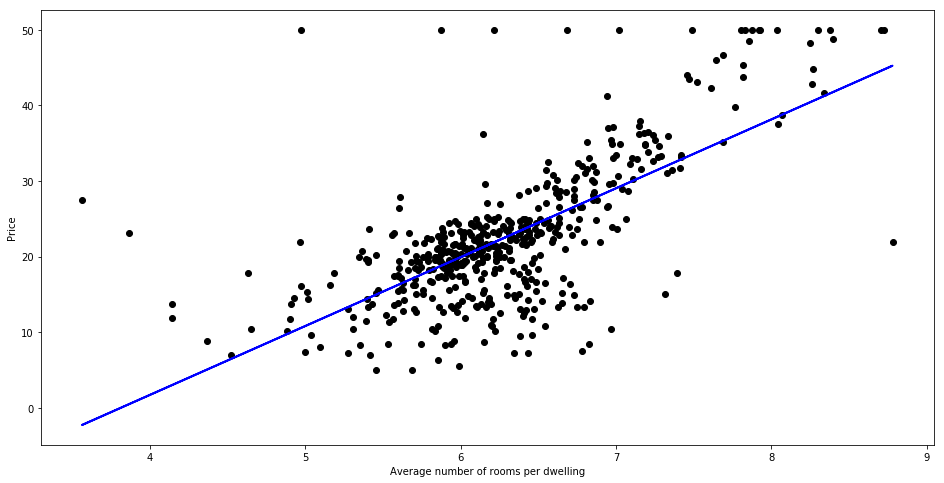

In [23]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    boston_df['RM'],
    boston_df['MEDV'],
    c='black'
)
plt.plot(
    boston_df['RM'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.show()

In [32]:
X_lstat = boston_df['LSTAT'].values.reshape(-1,1)
y_lstat = boston_df['MEDV'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_lstat, y_lstat)
print("The linear model is: Y = {:.5} + {:.5}X + \u03B5".format(reg.intercept_[0], 
                                                                reg.coef_[0][0]))

The linear model is: Y = 34.554 + -0.95005X + ε


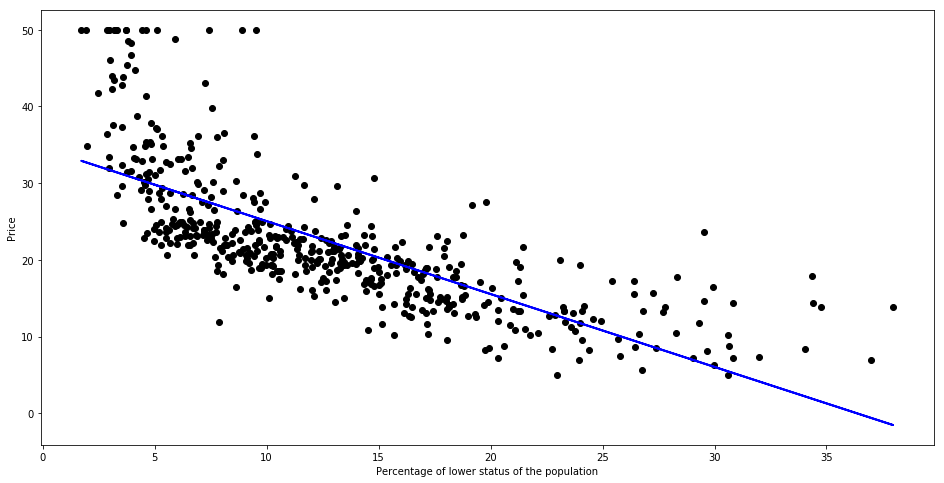

In [33]:
predictions = reg.predict(X_lstat)
plt.figure(figsize=(16, 8))
plt.scatter(
    boston_df['LSTAT'],
    boston_df['MEDV'],
    c='black'
)
plt.plot(
    boston_df['LSTAT'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Percentage of lower status of the population")
plt.ylabel("Price")
plt.show()

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [44]:
X = boston_df['RM']
y = boston_df['MEDV']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 03 May 2020   Prob (F-statistic):           2.49e-74
Time:                        08:18:35   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [35]:
X_lstat = boston_df['LSTAT']
y_lstat = boston_df['MEDV']
X2 = sm.add_constant(X_lstat)
est = sm.OLS(y_lstat, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 03 May 2020   Prob (F-statistic):           5.08e-88
Time:                        07:58:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [38]:
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM'])
Y = boston_df['MEDV']

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>

In [43]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


<< ADD YOUR TEXT HERE BY DOUBLE_CLICKING THIS CELL>>